In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("train.csv")
df = df.iloc[:, 1:] #dropping the id column it has nothing to do 

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>, <Axes: >]], dtype=object)

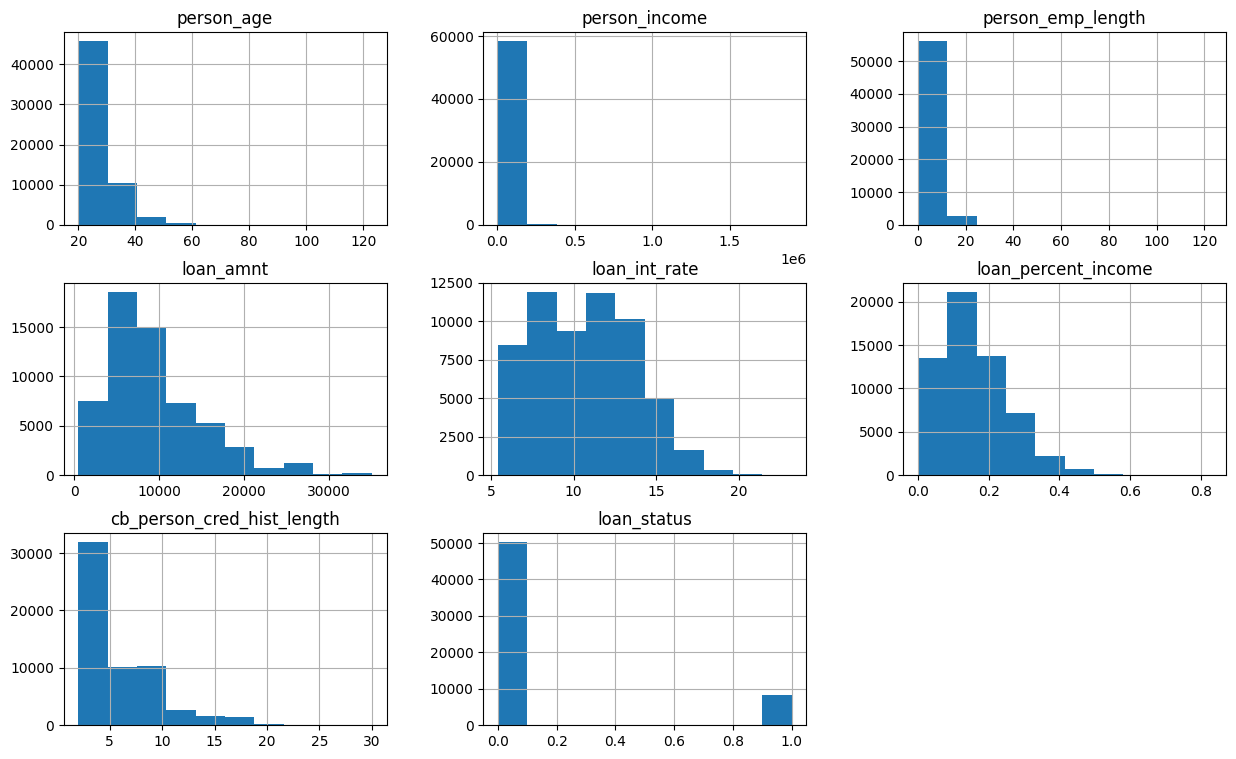

In [6]:
df.hist(figsize=(15,9))

In [7]:
correlation_matrix= df.select_dtypes(include=[np.number]).corr()
correlation_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


In [ ]:
plt.figure(figsize=(12,8))
corr_matrix= sns.heatmap(correlation_matrix , annot=True , cmap= 'coolwarm' , fmt='.3f' )

In [9]:
df1=df.copy()

In [ ]:
sns.boxplot(x=df1['person_age'])

we have a lot of outliers!

In [11]:
#TODO this is debatable because we are removing any person with age greater than 40!

Q1 = df1['person_age'].quantile(0.25)
Q3 = df1['person_age'].quantile(0.75)
IQR = Q3 - Q1
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)

# Define lower and upper bounds
lower_bound_age = Q1 - 1.5 * IQR
upper_bound_age = Q3 + 1.5 * IQR
print('lower bound _age:', lower_bound_age)
print('upper bound _age:', upper_bound_age)

# Find outliers
outliers = df1[(df1['person_age'] < lower_bound_age) | (df1['person_age'] > upper_bound_age)]
print('number of outliers wrt age:',len(outliers))
df2= df1.copy()
df2 = df1[~((df1['person_age'] < lower_bound_age) | (df1['person_age'] > upper_bound_age))]

Q1: 23.0
Q3: 30.0
IQR: 7.0
lower bound _age: 12.5
upper bound _age: 40.5
number of outliers wrt age: 2446


In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
numerical_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Define grid size
n_features = len(numerical_columns)
n_cols = 3  # Number of columns in the grid
n_rows = 3  # Calculate rows needed

# Create the grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:

# Calculate the IQR and remove outliers
for col in numerical_columns:
    Q1 = df2[col].quantile(0.25)  # First quartile
    Q3 = df2[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                 # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Filter out the outliers
    df2 = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]

# Plot boxplots again to confirm removal of outliers
n_features = len(numerical_columns)
n_cols = 3  # Number of columns in the grid
n_rows = 3  # Calculate rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

(array([[<Axes: title={'center': 'person_age'}>,
         <Axes: title={'center': 'person_income'}>,
         <Axes: title={'center': 'person_emp_length'}>],
        [<Axes: title={'center': 'loan_amnt'}>,
         <Axes: title={'center': 'loan_int_rate'}>,
         <Axes: title={'center': 'loan_percent_income'}>],
        [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
         <Axes: title={'center': 'loan_status'}>, <Axes: >]], dtype=object),)

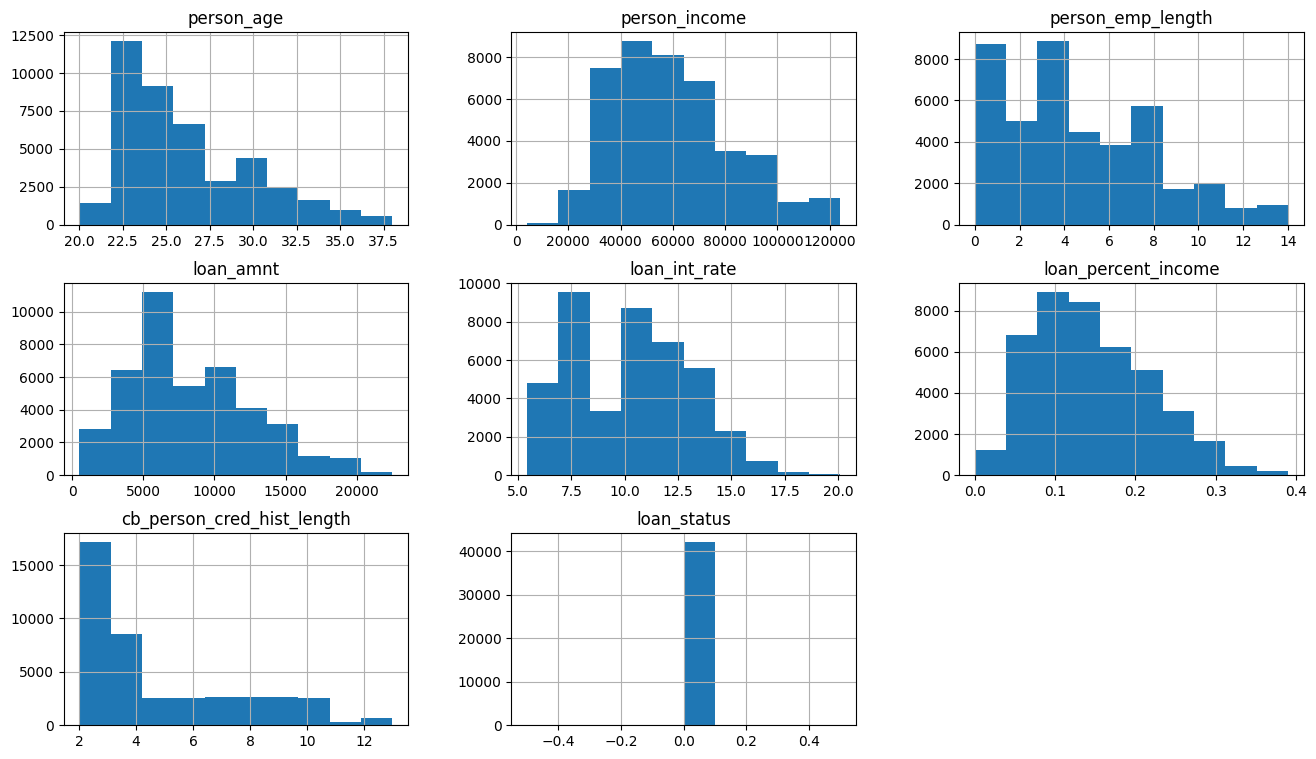

In [18]:
df2.hist(figsize=(16,9))

In [ ]:
df2.head()

In [ ]:
df2.info()

In [23]:
duplicates = df2.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows
if num_duplicates > 0:
    print("Duplicate rows:")
    print(df2[duplicates])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.
